<a href="https://colab.research.google.com/github/snowboarderhk/practice/blob/master/titanic_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#参考にしたサイト　https://www.codexa.net/kaggle-titanic-beginner/

#===== SVM ======


#ライブラリのインポート
import pandas as pd
import numpy as np

#データセット読み込み
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

#train.head()

#データセットのサイズ確認
test_shape = test.shape
train_shape = train.shape
#print(test_shape,train_shape)

#統計量確認
#train.describe() #test.describe()

#----欠損データの確認----
def kesson_table(df):
    null_val = df.isnull().sum() #isnull()は欠損データか否かを返す
    percent = 100* df.isnull().sum()/len(df)
    kesson_table = pd.concat([null_val,percent],axis=1)#concat は連結、引数のaxisは連結方向
    #print(kesson_table)
    kesson_table_ren_columns = kesson_table.rename(
    columns = {0:"欠損数",1:"%"})
    return kesson_table_ren_columns

#kesson_table(train)

#trainの欠損データ前処理(AgeとEmbarked)※Cabinは欠損率が高いため予測モデルに使用しない

#Age の欠損データは平均値を代理として使う
train["Age"]=train["Age"].fillna(train["Age"].mean()) #fillnaはすべてのnanを指定の値に置き換え

#Embarkedの欠損データは最も多いSとする。
train["Embarked"] = train["Embarked"].fillna("S")

#kesson_table(train)

#カテゴリカルなデータを数字に置き換える
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
train["Embarked"][train["Embarked"] == "S" ] = 0
train["Embarked"][train["Embarked"] == "C" ] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2
#train.head()

test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2
#test.head()

#kesson_table(test)

test["Age"] = test["Age"].fillna(test["Age"].mean())
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())
#kesson_table(test)

#trainデータセットを目的変数と説明変数に分ける
target = train["Survived"].values

features_one = train[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values
#testデータセットから説明変数の値を取得
test_features = test[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values

#正規化を試みる200518
from sklearn import preprocessing
ss = preprocessing.StandardScaler()

features_one_std = ss.fit_transform(features_one)
test_features_std = ss.fit_transform(test_features)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to b

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.layers import Dropout

Using TensorFlow backend.


In [4]:
#one hot encoding
target_one_hot = np_utils.to_categorical(target)


In [5]:
# モデルの作成
model = Sequential()
model.add(Dense(14, input_dim=7)) 
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(14, input_dim=14)) 
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(14, input_dim=14)) 
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(7, input_dim=14))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, input_dim=7))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Dense(3, input_dim=5))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(2)) # 出力層2ノード,全結合
model.add(Activation("sigmoid"))

In [6]:
model.compile(loss="binary_crossentropy",   # 誤差関数
              optimizer="adam",     # 最適化手法
              metrics=['accuracy'])

In [7]:
# 訓練
history = model.fit(features_one_std, target_one_hot, nb_epoch=40, batch_size=32) # 学習

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/40
891/891 [==============================] - 1s 1ms/step - loss: 0.7536 - accuracy: 0.5398
Epoch 2/40
891/891 [==============================] - 0s 95us/step - loss: 0.6788 - accuracy: 0.6111
Epoch 3/40
891/891 [==============================] - 0s 121us/step - loss: 0.6146 - accuracy: 0.6964
Epoch 4/40
891/891 [==============================] - 0s 108us/step - loss: 0.5913 - accuracy: 0.6964
Epoch 5/40
891/891 [==============================] - 0s 101us/step - loss: 0.5518 - accuracy: 0.7306
Epoch 6/40
891/891 [==============================] - 0s 89us/step - loss: 0.5064 - accuracy: 0.7660
Epoch 7/40
891/891 [==============================] - 0s 89us/step - loss: 0.5236 - accuracy: 0.7694
Epoch 8/40
891/891 [==============================] - 0s 89us/step - loss: 0.5095 - accuracy: 0.7716
Epoch 9/40
891/891 [==============================] - 0s 88us/step - loss: 0.5115 - accuracy: 0.7767
Epoch 10/40
891/891 [==============================] - 0s 89us/step - loss: 0.4920 - accu

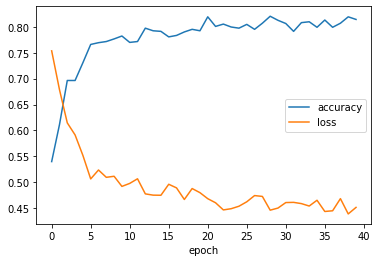

In [8]:
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.xlabel("epoch")
plt.legend()

In [9]:
pred = model.predict(test_features_std)

predd = np.argmax(pred, axis=1)

# PassengerIDを取得
PassengerId = np.array(test["PassengerId"]).astype(int)

# my_predictionとPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(predd,PassengerId,columns = ["Survived"])

# my_tree_one.csvとして出力
my_solution.to_csv("/content/my_dl_one.csv",index_label = ["PassengerId"])

In [10]:
#公差検証
from sklearn.model_selection import cross_val_score
#SVMによる予測
from sklearn.svm import SVC

Ctune = np.arange(0.9,1.1,0.05)
gammatune = np.arange(0.1,0.3,0.02)
maxc = 0.0
maxg = 0.0
maxscore = 0.0


#パラメータの意味参考https://qiita.com/sz_dr/items/f3d6630137b184156a67
for i in Ctune:
    for j in gammatune:
        clf = SVC(kernel="rbf",C=i,gamma=j,random_state=1) #score ???? データセットを拡張して試す
        # 交差検証
        scores = cross_val_score(clf, features_one_std,target)
        # スコアの平均値
        if maxscore <= np.mean(scores):
            maxc = i
            maxg = j
            maxscore = np.mean(scores)
print(maxscore)
print(maxc)
print(maxg)

0.831648986253217
1.1
0.14


In [11]:
clf = SVC(kernel="rbf",C=maxc,gamma=maxg,random_state=1)
clf.fit(features_one_std,target)
print(clf.score(features_one_std,target))

scores = cross_val_score(clf,features_one_std,target)
print(np.mean(scores))

0.8451178451178452
0.831648986253217


In [12]:
pred = clf.predict(test_features_std)

# PassengerIDを取得
PassengerId = np.array(test["PassengerId"]).astype(int)

# my_predictionとPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(pred,PassengerId,columns = ["Survived"])

# my_tree_one.csvとして出力
my_solution.to_csv("/content/my_svm_one.csv",index_label = ["PassengerId"])

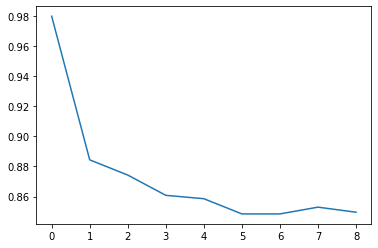

In [13]:
#k近傍法
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

KScore = []
#訓練データによる学習
for k in range (1,10):
    clf=KNeighborsClassifier(n_neighbors=k) # 
    clf.fit(features_one_std,target)#score 0.75598
    #学習データのスコア
    KScore.append(clf.score(features_one_std,target))

plt.plot(KScore)

In [14]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(features_one_std,target)
print(clf.score(features_one_std,target))

0.8608305274971941


In [16]:
pred = clf.predict(test_features_std)

# PassengerIDを取得
PassengerId = np.array(test["PassengerId"]).astype(int)

# my_predictionとPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(pred,PassengerId,columns = ["Survived"])

# my_tree_one.csvとして出力
my_solution.to_csv("/content/my_kneighbors_one.csv",index_label = ["PassengerId"])

In [17]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression(C=10)
clf.fit(features_one_std,target)
print(clf.score(features_one_std,target))

0.8024691358024691


In [19]:
pred = clf.predict(test_features_std)

# PassengerIDを取得
PassengerId = np.array(test["PassengerId"]).astype(int)

# my_predictionとPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(pred,PassengerId,columns = ["Survived"])

# my_tree_one.csvとして出力
my_solution.to_csv("/content/my_logistic_one.csv",index_label = ["PassengerId"])

In [20]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

mdl = RandomForestClassifier(max_depth=5,n_estimators=100, random_state=0)
mdl.fit(features_one_std,target)

print(mdl.score(features_one_std,target))

#モデルを使った予測
pred = mdl.predict(test_features_std)

0.8484848484848485


In [21]:
# PassengerIDを取得
PassengerId = np.array(test["PassengerId"]).astype(int)

# my_predictionとPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(pred,PassengerId,columns = ["Survived"])

# my_tree_one.csvとして出力
my_solution.to_csv("/content/my_randomforest_one.csv",index_label = ["PassengerId"])

In [24]:
#ベイジアン推定
from sklearn.naive_bayes import BernoulliNB

In [25]:
clf = BernoulliNB()
clf.fit(features_one_std,target)
#学習データのスコア
print(clf.score(features_one,target))

0.7800224466891134


In [26]:
pred = clf.predict(test_features_std)

# PassengerIDを取得
PassengerId = np.array(test["PassengerId"]).astype(int)

# my_predictionとPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(pred,PassengerId,columns = ["Survived"])

# my_tree_one.csvとして出力
my_solution.to_csv("/content/my_baysian_one.csv",index_label = ["PassengerId"])

In [28]:
import pandas as pd

sub_baysian = pd.read_csv('/content/my_baysian_one.csv')
sub_dl = pd.read_csv('/content/my_dl_one.csv')
sub_kneighbors = pd.read_csv('/content/my_kneighbors_one.csv')
sub_logistic = pd.read_csv("/content/my_logistic_one.csv")
sub_randomforest = pd.read_csv("/content/my_randomforest_one.csv")
sub_svm = pd.read_csv("/content/my_svm_one.csv")

In [29]:
sub = pd.DataFrame(pd.read_csv('/content/test.csv')['PassengerId'])
sub['Survived'] = sub_baysian['Survived'] + sub_dl['Survived'] + sub_kneighbors['Survived']+sub_logistic['Survived'] + sub_randomforest['Survived'] + sub_svm['Survived']
sub['Survived'] = (sub['Survived'] >= 4).astype(int)
sub.to_csv('/content/ensemble.csv', index=False)